# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Esteban Munoz

- ID: A01644609

- My carreer: ITC


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [5]:
# Definir si se ejecuta en Google Colab o localmente
RunInColab = True  # (False: no  | True: sí)

# Si se ejecuta en Google Colab:
if RunInColab:
    from google.colab import drive
    drive.mount('/content/drive')

    # Definir la ruta del archivo en la carpeta NotebooksProfessor
    Ruta = "/content/drive/My Drive/NotebooksProfessor/"

else:
    # Si se ejecuta localmente, definir la ruta donde se encuentra el archivo
    Ruta = ""

url = Ruta + "A01644609_X.csv"
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## b) Data managment


Print the first 7 rows

In [6]:
print("First 7 rows:")
print(df.head(7))

First 7 rows:
   Unnamed: 0        x1        x2        x3        x4        x5        x6  \
0           0 -0.120754  8.579858  8.116308 -4.461824  5.245080 -6.614241   
1           1 -5.721522 -1.073909  4.280685 -3.195351 -2.768564  5.764707   
2           2 -9.671526  9.351527  0.907592  6.890400 -1.896574 -6.304388   
3           3 -8.528787  9.096574 -1.264621  2.949121  2.271779  0.936809   
4           4 -3.235838  5.149849  8.209112 -6.578392  1.267160 -8.609206   
5           5 -4.372733  4.688934  4.038268 -4.407710 -3.817624  5.531685   
6           6  1.414617 -9.464817  7.385113  8.508291 -4.491463  1.933841   

          x7         x8  
0  11.877730 -12.325416  
1  -4.770639   5.608281  
2   0.712389  -3.260579  
3   4.304978   1.429732  
4  12.027604  -8.166784  
5  -3.755652   6.721713  
6  -4.887761  -5.174615  


Print the last 4 rows

In [7]:
print("\nLast 4 rows:")
print(df.tail(4))



Last 4 rows:
     Unnamed: 0        x1        x2        x3        x4        x5        x6  \
510         510 -1.067642  6.690730  7.219520 -8.282919  5.958503 -5.917086   
511         511 -2.316158 -7.053114  7.426118  7.588199 -4.408458  2.503339   
512         512 -4.320419  3.254576  4.882948 -7.303595 -0.056409  5.033515   
513         513 -9.014964  7.213808 -1.360234  1.352082  1.602533 -4.022058   

           x7         x8  
510  9.260185 -11.752155  
511 -3.672301  -9.304095  
512 -4.282430   7.202812  
513  3.605237   1.259508  


How many rows and columns are in your data?

Use the `shape` method


In [8]:
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(514, 9)


Print the name of all columns

Use the `columns` method

In [9]:
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [10]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
dtype: object


What is the meaning of rows and columns?

Your responses here

1. **Filas:** Las filas en el conjunto de datos representan instancias o registros de datos, cada una con un conjunto de valores para las variables que se están observando. En este caso, las filas corresponden a 514 observaciones diferentes, cada una con medidas de 8 variables diferentes (de x1 a x8).

2. **Columnas:** Las columnas representan las variables que se miden para cada registro. Cada columna contiene datos sobre una característica específica de las observaciones. Por ejemplo, x1, x2, x3, etc., son las variables numéricas que están siendo observada.

3. **Filas y columnas en conjunto:** El conjunto de datos tiene un total de 514 filas (cada fila representa una observación de los valores de las variables) y 8 columnas (cada columna representa una variable medida para todas las observaciones). Ambas permiten analizar cómo se comportan las variables entre sí y cómo varían a lo largo de las observaciones.

...

Print a statistical summary of your columns


In [11]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       Unnamed: 0          x1          x2          x3          x4          x5  \
count  514.000000  514.000000  514.000000  514.000000  514.000000  514.000000   
mean   256.500000   -3.125741    3.257131    4.727136   -0.586698   -0.591153   
std    148.523287    3.458492    6.540301    4.196867    7.015484    3.680384   
min      0.000000  -12.694065  -11.262591   -5.915192  -13.359625   -8.863402   
25%    128.250000   -5.460604   -1.478422    1.407805   -6.776059   -3.329010   
50%    256.500000   -2.606308    4.943058    5.621734   -1.537798   -0.950259   
75%    384.750000   -0.660585    8.582963    7.956551    5.518766    2.262518   
max    513.000000    5.238093   13.271048   13.090603   14.064722    9.474120   

               x6          x7          x8  
count  514.000000  514.000000  514.000000  
mean    -0.063145    1.464426   -2.679459  
std      4.939264    5.947030    6.884225  
min    -10.730624   -9.347901  -16.043786  
25%     -4.047724   -3.35637

**1. What is the minumum and maximum values of each variable:**

Mínimo y máximo de cada variable:

x1: Mínimo = -12.694, Máximo = 5.238

x2: Mínimo = -11.263, Máximo = 13.271

x3: Mínimo = -5.915, Máximo = 13.091

x4: Mínimo = -13.360, Máximo = 14.065

x5: Mínimo = -8.863, Máximo = 9.474

x6: Mínimo = -10.731, Máximo = 11.689

x7: Mínimo = -9.348, Máximo = 15.356

x8: Mínimo = -16.044, Máximo = 10.759


**2. What is the mean and standar deviation of each variable:**

Media (mean) y desviación estándar (std) de cada variable:

x1: Media = -3.126, Desviación estándar = 3.458

x2: Media = 3.257, Desviación estándar = 6.540

x3: Media = 4.727, Desviación estándar = 4.197

x4: Media = -0.587, Desviación estándar = 7.015

x5: Media = -0.591, Desviación estándar = 3.680

x6: Media = -0.063, Desviación estándar = 4.939

x7: Media = 1.464, Desviación estándar = 5.947

x8: Media = -2.679, Desviación estándar = 6.884


**3. What the 25%, 50% and 75% represent?:**

Estas cifras corresponden a los percentiles de cada variable:

25% (Primer cuartil): Este valor indica el punto en el que el 25% de los datos son menores o iguales a este valor.

50% (Mediana): Este es el valor que divide a los datos en dos partes iguales. La mitad de los datos son menores o iguales a este valor, y la otra mitad es mayor o igual.

75% (Tercer cuartil): Este valor indica el punto en el que el 75% de los datos son menores o iguales a este valor.

Rename the columns using the same name with capital letters

In [12]:
df.columns = [col.upper() for col in df.columns]
print("\nColumns renamed to capital letters:")
print(df.columns)


Columns renamed to capital letters:
Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')


Rename the columns to their original names

In [13]:
original_columns = ['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
df.columns = original_columns
print("\nColumns renamed to original names:")
print(df.columns)



Columns renamed to original names:
Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype='object')


Use two different alternatives to get one of the columns

In [16]:
# First alternative: Using dot notation
x1_column_dot = df.x1

# Second alternative: Using bracket notation
x1_column_bracket = df['x1']

print("\nColumn 'x1' using dot notation:")
print(x1_column_dot.head())  # Show first 5 rows of x1

print("\nColumn 'x1' using bracket notation:")
print(x1_column_bracket.head())  # Show first 5 rows of x1



Column 'x1' using dot notation:
0   -0.120754
1   -5.721522
2   -9.671526
3   -8.528787
4   -3.235838
Name: x1, dtype: float64

Column 'x1' using bracket notation:
0   -0.120754
1   -5.721522
2   -9.671526
3   -8.528787
4   -3.235838
Name: x1, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [17]:
slice_data = df.iloc[61:72, 1:3]  # Row indices 61 to 71 (second and third columns)
print("\nSlice of data (rows 62 to 72, second and third columns):")
print(slice_data)


Slice of data (rows 62 to 72, second and third columns):
           x1        x2
61  -3.811159  5.386766
62  -0.619869  4.381188
63 -10.827151  6.657834
64  -6.397307  5.398132
65  -1.154589 -6.776228
66  -3.277774  3.008132
67 -10.444634  7.287817
68  -2.737033  4.169606
69  -3.775857  7.863972
70  -7.486026  9.417164
71  -5.601031  7.491842


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [20]:
null_values = df[['x1', 'x2']].isnull().sum()
not_null_values = df[['x1', 'x2']].notnull().sum()

print("\nNumber of null values in columns 'x1' and 'x2':")
print(null_values)

print("\nNumber of not null values in columns 'x1' and 'x2':")
print(not_null_values)

total_rows = df.shape[0]
print("\nSum of null and not null values (should equal the total number of rows):")
print(null_values + not_null_values)
print(f"Total number of rows: {total_rows}")


Number of null values in columns 'x1' and 'x2':
x1    0
x2    0
dtype: int64

Number of not null values in columns 'x1' and 'x2':
x1    514
x2    514
dtype: int64

Sum of null and not null values (should equal the total number of rows):
x1    514
x2    514
dtype: int64
Total number of rows: 514


Discard the last column


In [21]:
df_dropped = df.drop(columns=['x8'])
print("\nDataFrame after discarding the last column ('x8'):")
print(df_dropped.head())


DataFrame after discarding the last column ('x8'):
   Unnamed: 0        x1        x2        x3        x4        x5        x6  \
0           0 -0.120754  8.579858  8.116308 -4.461824  5.245080 -6.614241   
1           1 -5.721522 -1.073909  4.280685 -3.195351 -2.768564  5.764707   
2           2 -9.671526  9.351527  0.907592  6.890400 -1.896574 -6.304388   
3           3 -8.528787  9.096574 -1.264621  2.949121  2.271779  0.936809   
4           4 -3.235838  5.149849  8.209112 -6.578392  1.267160 -8.609206   

          x7  
0  11.877730  
1  -4.770639  
2   0.712389  
3   4.304978  
4  12.027604  


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

El conjunto de datos contiene 514 observaciones, cada una con 8 variables numéricas. Las filas representan instancias o registros individuales, mientras que las columnas corresponden a diferentes variables medidas en cada observación. Las columnas incluyen un índice (Unnamed: 0) y siete variables de interés denominadas x1, x2, x3, x4, x5, x6, x7, y x8. Los valores de estas variables son números flotantes.

Las filas son las observaciones del conjunto de datos, y cada fila contiene valores asociados con las variables de las columnas. El índice (Unnamed: 0) parece servir como un identificador o referencia para cada observación. Las otras columnas, x1 a x8, contienen diferentes **mediciones** o características de las observaciones.

# **Estadísticas Descriptivas:**

Las estadísticas proporcionadas ofrecen información clave sobre el comportamiento de cada variable:

**Rango de Valores:** Las variables muestran una amplia variedad de valores, desde negativos hasta positivos. Por ejemplo, para la variable x1, los valores van de -12.69 a 5.24, lo que indica que los datos pueden estar distribuidos en diferentes escalas. Las otras variables también presentan rangos que varían ampliamente.

**Tendencia Central (Media):** Las medias de las variables varían, algunas siendo negativas, como x1 con una media de -3.13, y otras positivas, como x2, con una media de 3.26. Esto sugiere que algunas variables tienden a tener valores más cercanos a cero, mientras que otras presentan sesgo hacia valores negativos o positivos.

**Dispersión (Desviación Estándar)**: Las desviaciones estándar indican la dispersión de los datos en torno a la media. Variables como x4 muestran una mayor dispersión (7.02), lo que sugiere que los valores de esta variable son más dispersos respecto a la media. Otras variables, como x1, tienen una desviación estándar menor (3.46), lo que indica menor variabilidad.

**Distribución (Percentiles):** Los percentiles de las variables también ayudan a entender la distribución de los datos. Por ejemplo, para x1, el primer cuartil (25%) es -5.46, lo que significa que el 25% de los datos son menores o iguales a este valor. La mediana (50%) es -2.61, y el tercer cuartil (75%) es -0.66.

**Valores Nulos**: El conjunto de datos parece estar bien compuesto, ya que no contiene una cantidad significativa de valores nulos.



## c) Data visualization

Plot in the histogram of one of the variables

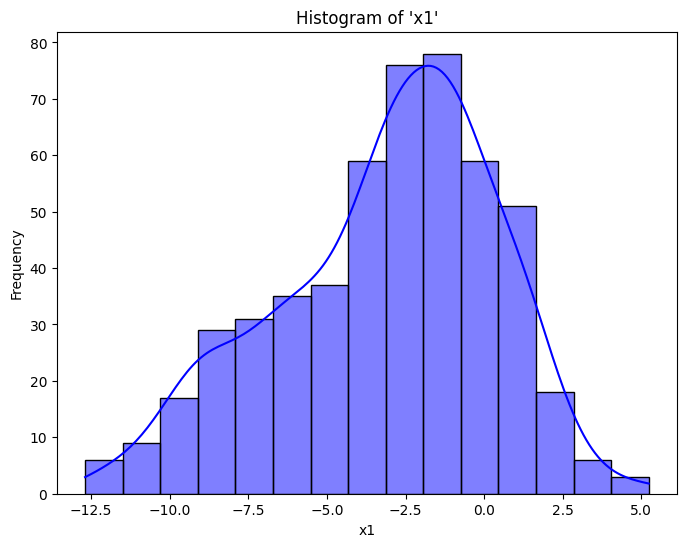

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['x1'], kde=True, color='blue')
plt.title("Histogram of 'x1'")
plt.xlabel('x1')
plt.ylabel('Frequency')
plt.show()

Plot in the same figure the histogram of two variables



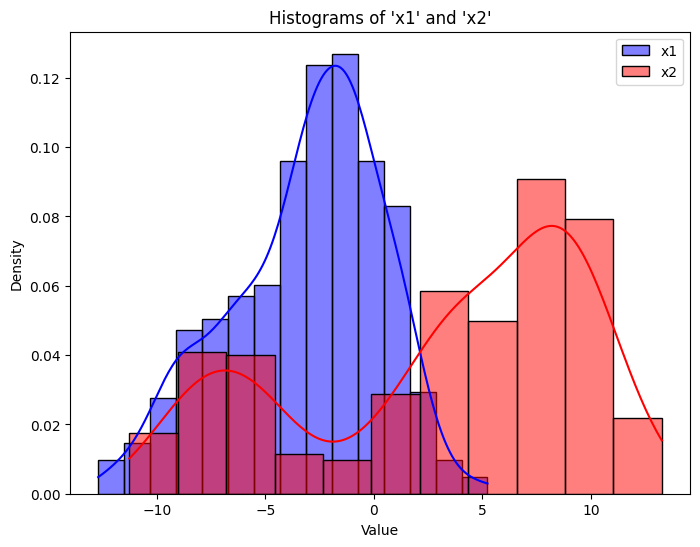

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['x1'], kde=True, color='blue', label='x1', stat='density', alpha=0.5)
sns.histplot(df['x2'], kde=True, color='red', label='x2', stat='density', alpha=0.5)
plt.title("Histograms of 'x1' and 'x2'")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

**Your response here:**


El histograma de x1 muestra una distribución aproximadamente simétrica y parece tener una distribución normal, con la mayoría de los valores concentrados en torno a 0, con una caída gradual hacia los extremos.

Al comparar los histogramas de x1 y x2, podemos observar que x1 tiene una distribución más ancha y casi simétrica, mientras que x2 tiene una distribución sesgada a la derecha, con un pico más pronunciado y valores altos que se extienden hacia la derecha.

Estos patrones sugieren que las variables x1 y x2 tienen distribuciones diferentes, lo que puede ser relevante al analizar la relación entre ellas o al construir modelos predictivos

Plot the boxplot of one of the variables

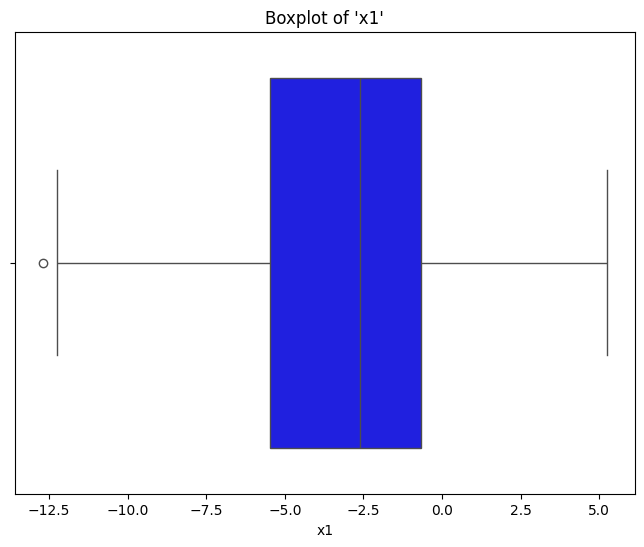

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['x1'], color='blue')
plt.title("Boxplot of 'x1'")
plt.xlabel('x1')
plt.show()

Plot in the same figure the boxplot of two variables

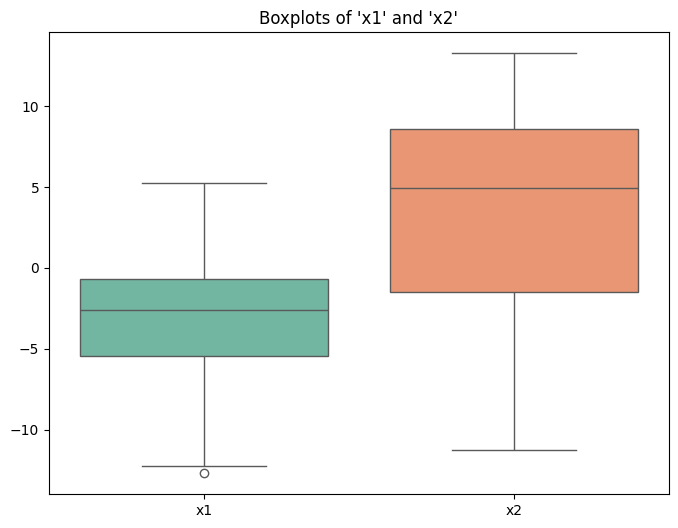

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['x1', 'x2']], palette='Set2')
plt.title("Boxplots of 'x1' and 'x2'")
plt.show()

Based on these plots, provide a description of your data:

**Your response here:**

**Boxplot de x1: **El boxplot de la variable x1 muestra que la distribución está bastante concentrada alrededor de la mediana, que parece estar cerca de 0. Sin embargo, hay algunos valores atípicos a la izquierda, lo que sugiere que hay algunos valores extremos negativos. Además, el rango intercuartílico (entre el primer y tercer cuartil) no es demasiado amplio, lo que indica una dispersión moderada.

**Boxplot de x1 y x2:** Al comparar los boxplots de las variables x1 y x2, vemos que x1 tiene una distribución más compacta y centrada en valores negativos, mientras que x2 muestra una mayor dispersión y valores más altos, con una mediana también más alta que la de x1. x2 tiene una mayor variabilidad, como lo muestra su rango intercuartílico más amplio y la presencia de algunos valores atípicos, principalmente hacia la parte superior.

# **Conclusión:**
x1 tiene una distribución más estrecha y se concentra alrededor de valores negativos, con pocos valores extremos.

x2 tiene una distribución más dispersa, con valores más altos y una mayor presencia de valores atípicos, lo que indica una mayor variabilidad en comparación con x1.

Plot the scatter plot between all pair of variables

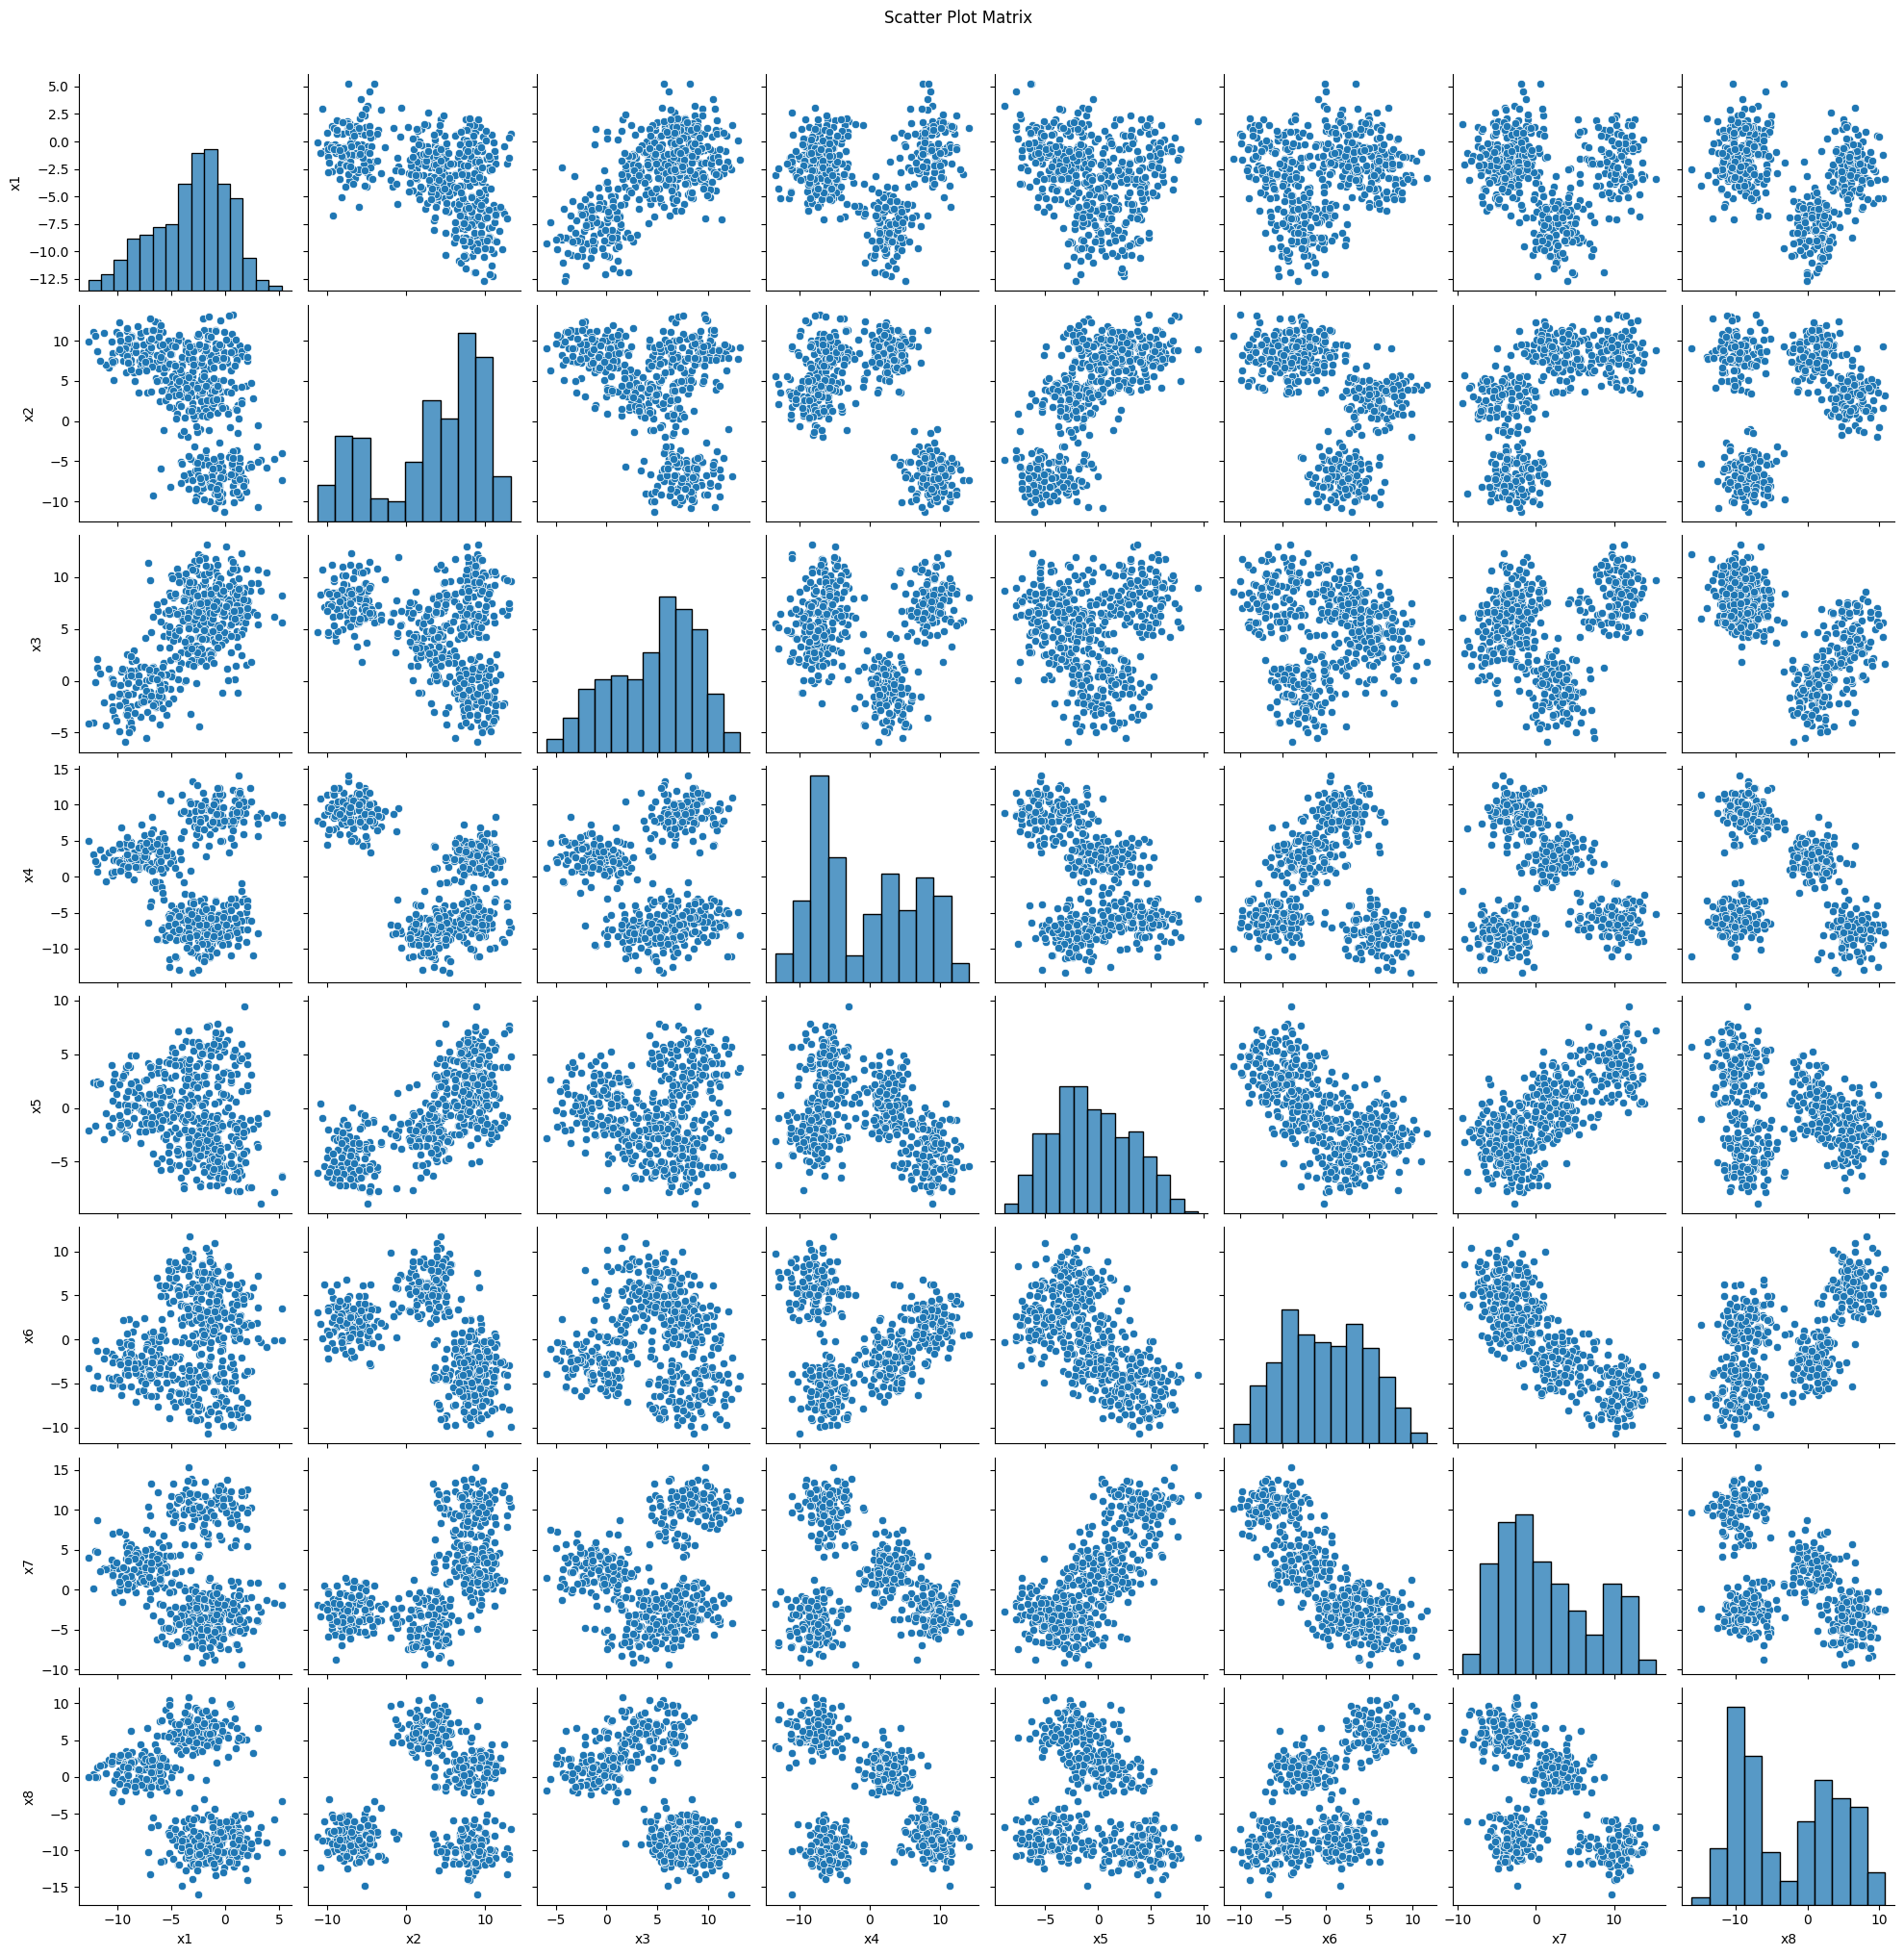

In [26]:
sns.pairplot(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:


El conjunto de datos consta de 8 variables numéricas con distribuciones diversas. Algunas variables, como x1, tienen una distribución aproximada a la normal, mientras que otras, como x2, muestran una distribución sesgada, especialmente hacia valores positivos. Los gráficos de dispersión revelan que las variables no presentan correlaciones lineales claras, aunque algunas tienen relaciones no lineales o dispersas, como x1 y x7. En general, las variables muestran diferentes niveles de dispersión, lo que sugiere que algunas tienen un rango más concentrado, mientras que otras están más dispersas. Esto indica que podrían ser necesarias técnicas más avanzadas para explorar sus interacciones y relaciones, especialmente al realizar análisis bivariados o modelado predictivo.









## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])


KMeans(n_clusters=3, random_state=42)

Add to your dataset a column with the estimated cluster to each data point

In [29]:
df['Cluster'] = kmeans.labels_

Print the number associated to each cluster

In [30]:
print("\nCluster labels for each data point:")
print(df['Cluster'].value_counts())


Cluster labels for each data point:
Cluster
0    256
1    129
2    129
Name: count, dtype: int64


Print the centroids

In [31]:
print("\nCentroids of the clusters:")
print(kmeans.cluster_centers_)


Centroids of the clusters:
[[-4.8376411   8.42469896  3.63346839 -1.66502523  2.20022653 -4.13860197
   6.3690136  -4.31125602]
 [-2.29374151  3.03589464  4.01762575 -7.8551753  -2.33338976  6.06980294
  -4.1470051   6.22075202]
 [-0.56048051 -6.77665079  7.60702542  8.82171557 -4.388397    1.89163549
  -2.65727605 -8.34137572]]


Print the intertia metric

In [32]:
print("\nInertia (sum of squared distances to the closest cluster center):")
print(kmeans.inertia_)


Inertia (sum of squared distances to the closest cluster center):
41502.38185493106


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

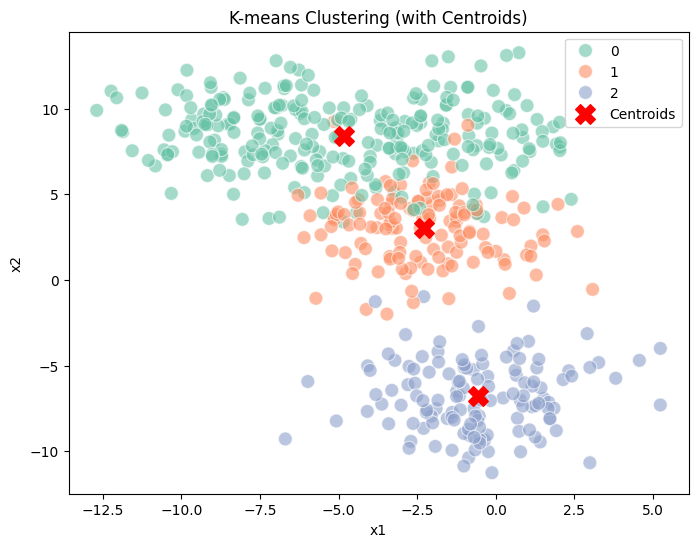

In [35]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['Cluster'], palette='Set2', s=100, alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title('K-means Clustering (with Centroids)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

### Questions

Provides a detailed description of your results

**Your response:**

En el gráfico de dispersión de K-means con los centroides, se puede observar cómo el algoritmo ha agrupado los puntos de datos en tres clusters. Los puntos de datos en cada cluster están distribuidos de forma que parece que el algoritmo ha encontrado tres grupos bien diferenciados. A continuación, se detallan los resultados:

**Distribución de los Clusters:**

**Cluster 0 (verde):** Los puntos en este cluster están agrupados en la parte superior izquierda del gráfico, con valores altos para x2 y valores negativos para x1. Este cluster parece ser el más disperso, pero aún así tiene una forma relativamente compacta.

**Cluster 1 (naranja):** Los puntos en este cluster se encuentran en una zona intermedia entre los otros dos clusters, con valores de x2 alrededor de 5 a 10, y x1 entre -5 y 0. Este cluster parece estar más centrado y menos disperso que el primero.

**Cluster 2 (azul):** Los puntos en este cluster están en la parte inferior del gráfico, con valores negativos tanto en x1 como en x2. Es un grupo más denso que los otros, con una mayor concentración de puntos en un área relativamente pequeña.

**Centroides:**

Los centroides de los tres clusters se encuentran representados por los puntos rojos en forma de X. Estos son los puntos medios de cada uno de los clusters.

Centroides:

El centroide del cluster 0 (verde) está ubicado en una posición de x1 negativo y x2 alto.

El centroide del cluster 1 (naranja) está cerca del centro entre los dos primeros clusters.

El centroide del cluster 2 (azul) está ubicado en la parte inferior izquierda, donde se encuentran los puntos con valores más negativos de x1 y x2.

**Inercia:**

La inercia del modelo es una medida de la "compactación" de los clusters, o cuán cerca están los puntos de cada cluster respecto a su centroide. Un valor de inercia de 41,502.38 sugiere que los puntos de datos están relativamente bien distribuidos dentro de sus clusters, pero no necesariamente de manera perfecta.

## d) Elbow plot

Compute the Elbow plot

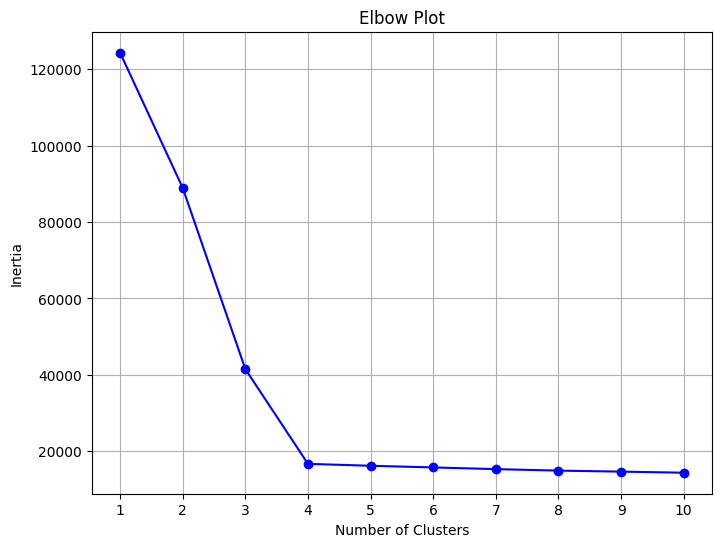

In [36]:
# 1) Compute the Elbow plot
inertia_values = []

# We will test different numbers of clusters (e.g., from 1 to 10)
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

**1) Mejor Número de Clusters (K):**

El mejor número de clusters es 3. En el gráfico de Elbow, se observa una disminución pronunciada de la inercia al pasar de 1 a 3 clusters. Después del tercer cluster, la disminución de la inercia se vuelve mucho más pequeña y casi se nivela. Esto indica que agregar más clusters no mejora significativamente el ajuste del modelo a los datos. Por lo tanto, el número óptimo de clusters es donde ocurre este "codo", que es en 3 clusters.

**2) ¿Este número de clusters concuerda con tu suposición inicial?**

Sí, concuerda. Al observar los gráficos de dispersión previos, ya era razonable suponer que el número de clusters sería alrededor de 3, ya que los puntos parecían agruparse en tres regiones claras. El gráfico de Elbow confirma esta suposición, ya que el valor de inercia disminuye rápidamente con 3 clusters y luego se estabiliza.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [3]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1) Load the dataset from "sklearn.datasets"
digits = load_digits()
X = digits.data  # All features (pixels)
y = digits.target  # True labels

2) Plot some of the observations (add in the title the label/digit of that obserbation)

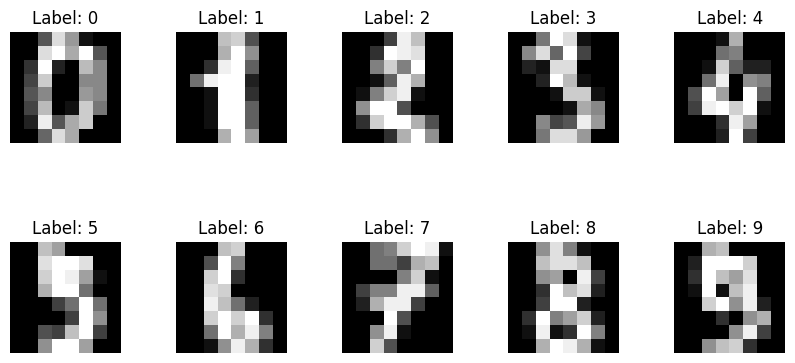

In [5]:
# 2) Plot some of the observations (add in the title the label/digit of that observation)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(10):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [6]:
# 3) K-means clustering in different cases:

# KMeans All: Using all 64 variables/pixels/features
kmeans_all = KMeans(n_clusters=10, random_state=42)
kmeans_all.fit(X)

# KMeans 1row: Using only the 8 variables/pixels/features from the first row
X_1row = X[:, :8]
kmeans_1row = KMeans(n_clusters=10, random_state=42)
kmeans_1row.fit(X_1row)

# KMeans 4row: Using only the 8 variables/pixels/features from the fourth row
X_4row = X[:, 24:32]
kmeans_4row = KMeans(n_clusters=10, random_state=42)
kmeans_4row.fit(X_4row)

# KMeans 8row: Using only the 8 variables/pixels/features from the eighth row
X_8row = X[:, 56:64]
kmeans_8row = KMeans(n_clusters=10, random_state=42)
kmeans_8row.fit(X_8row)


KMeans(n_clusters=10, random_state=42)

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

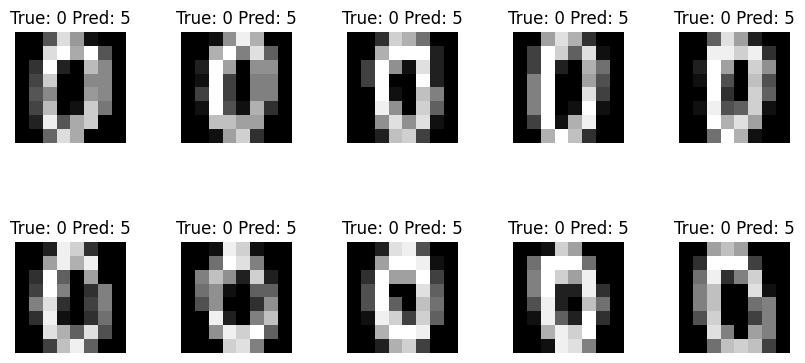

In [8]:
# 4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check the clustering
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

# Plot some observations and their clustering results for the "0"
digit_label = 0
indices = np.where(y == digit_label)[0]

for i, index in enumerate(indices[:10]):
    axes[i].imshow(X[index].reshape(8, 8), cmap='gray')
    predicted_label = kmeans_all.labels_[index]
    axes[i].set_title(f"True: {y[index]} Pred: {predicted_label}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


5) Compute the Elbow plot

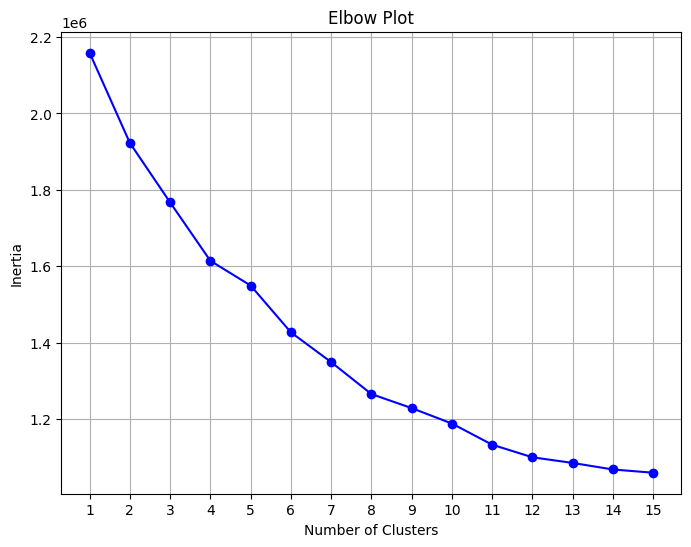

In [9]:
# 5) Compute the Elbow plot
inertia_values = []

# We will test different numbers of clusters (e.g., from 1 to 15)
for n_clusters in range(1, 16):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

# **Descripción de los Resultados:**

**Verificación de la Clustering:** Al observar las imágenes de las observaciones y sus respectivas etiquetas predichas, podemos ver que el modelo de clustering no ha clasificado correctamente las observaciones del dígito "0". Esto indica que el KMeans clustering no es perfecto y hay una clara mala asignación de los dígitos.

Los resultados muestran que las observaciones dentro de un mismo dígito no siempre se agrupan correctamente. Esto puede ser un indicio de que la información de solo algunas filas (como Kmeans1row, Kmeans4row, o Kmeans8row) no es suficiente para identificar correctamente el dígito completo. Esto sugiere que usar todas las características (KmeansAll) probablemente sea la opción más efectiva para el clustering, ya que utiliza toda la información de las imágenes de los dígitos.

**Elbow Plot:** En el Elbow Plot (gráfico de codo), se observa que la inercia disminuye rápidamente al aumentar el número de clusters hasta llegar a 4 clusters, donde la tasa de disminución de la inercia se estabiliza. Esto sugiere que el número óptimo de clusters para este conjunto de datos es probablemente 4.

**Análisis de K-means en diferentes configuraciones:**

**KMeansAll (usando todas las 64 características):** Este es el método más completo, ya que utiliza toda la información de la imagen (todas las características de los píxeles). Aunque el clustering no es perfecto, es probable que este método produzca los mejores resultados en comparación con los otros enfoques.

**KMeans1row (usando solo los 8 píxeles de la primera fila):** Este enfoque utiliza solo una parte limitada de la imagen, lo que probablemente no capture suficiente variabilidad para hacer un buen clustering de los dígitos.

**KMeans4row y KMeans8row (usando solo los píxeles de las filas 4 y 8):** Al igual que con Kmeans1row, estos enfoques usan solo una parte de la información (una fila específica de píxeles), lo que también puede llevar a una asignación incorrecta de los dígitos.


# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 1) Load the dataset from "sklearn.datasets"
digits = load_digits()
X = digits.data  # All features (pixels)
y = digits.target  # True labels

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

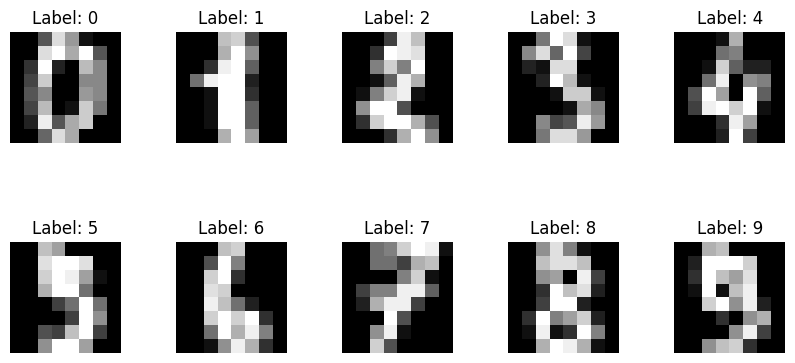

In [11]:
# 2) Plot some of the observations (add in the title the label/digit of that observation)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(10):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

3) Split the dataset in train and test

In [13]:
# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [14]:
# ClassifierAll: Using all 64 variables/pixels/features
svm_all = SVC(kernel='linear', random_state=42)
svm_all.fit(X_train, y_train)

# Classifier1col: Using only the 8 variables/pixels/features from the first column
X_train_1col = X_train[:, ::8]  # First column of pixels
X_test_1col = X_test[:, ::8]
svm_1col = SVC(kernel='linear', random_state=42)
svm_1col.fit(X_train_1col, y_train)

# Classifier4col: Using only the 8 variables/pixels/features from the fourth column
X_train_4col = X_train[:, 3::8]  # Fourth column of pixels
X_test_4col = X_test[:, 3::8]
svm_4col = SVC(kernel='linear', random_state=42)
svm_4col.fit(X_train_4col, y_train)

# Classifier8col: Using only the 8 variables/pixels/features from the eighth column
X_train_8col = X_train[:, 7::8]  # Eighth column of pixels
X_test_8col = X_test[:, 7::8]
svm_8col = SVC(kernel='linear', random_state=42)
svm_8col.fit(X_train_8col, y_train)

SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [15]:
# 3) Make predictions (use the test set)
y_pred_all = svm_all.predict(X_test)
y_pred_1col = svm_1col.predict(X_test_1col)
y_pred_4col = svm_4col.predict(X_test_4col)
y_pred_8col = svm_8col.predict(X_test_8col)


6) Compute performance metrics

In [16]:
print("ClassifierAll (All 64 features):")
print(classification_report(y_test, y_pred_all))
print(f"Accuracy: {accuracy_score(y_test, y_pred_all)}\n")

print("Classifier1col (First column):")
print(classification_report(y_test, y_pred_1col))
print(f"Accuracy: {accuracy_score(y_test, y_pred_1col)}\n")

print("Classifier4col (Fourth column):")
print(classification_report(y_test, y_pred_4col))
print(f"Accuracy: {accuracy_score(y_test, y_pred_4col)}\n")

print("Classifier8col (Eighth column):")
print(classification_report(y_test, y_pred_8col))
print(f"Accuracy: {accuracy_score(y_test, y_pred_8col)}\n")

ClassifierAll (All 64 features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.9777777777777777

Classifier1col (First column):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.08      1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

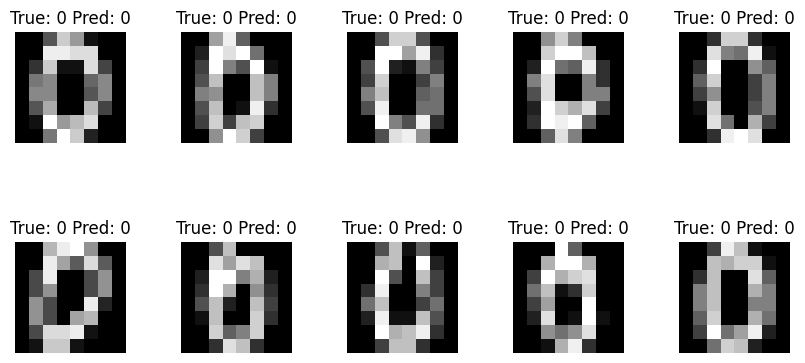

In [18]:
# 5) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

# For a specific digit (e.g., digit 0)
digit_label = 0
indices = np.where(y_test == digit_label)[0]

for i, index in enumerate(indices[:10]):  # Show the first 10 predictions for digit "0"
    axes[i].imshow(X_test[index].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"True: {y_test[index]} Pred: {y_pred_all[index]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

# **Descripción:**

**ClassifierAll (Usando las 64 características):**

*   Precisión: 0.98

**Informe de clasificación:** La clasificación es excelente, con una alta precisión y recuperación para todos los dígitos. Los valores de precisión, recall y f1-score están cerca de 1.0 para la mayoría de los dígitos, lo que indica que el modelo tiene un buen rendimiento en la clasificación de los dígitos, con una exactitud de 0.98 en el conjunto de prueba.




**Classifier1col (Usando solo la primera columna de píxeles):**

*   Precisión: 0.08

**Informe de clasificación:** El rendimiento es muy bajo, con precisión, recall y f1-score cercanos a 0 para la mayoría de las clases. La exactitud es de solo 0.08, lo que indica que el modelo no está realizando una clasificación adecuada. Esto es esperado, ya que la primera columna de píxeles no contiene suficiente información para identificar correctamente los dígitos.


**Classifier4col (Usando solo la cuarta columna de píxeles):**


*   Precisión: 0.62

**Informe de clasificación:** El modelo mejora con respecto a Classifier1col, pero aún tiene un rendimiento limitado. La exactitud es de 0.62, lo que muestra que la cuarta columna de píxeles proporciona algo de información útil, pero no suficiente para una clasificación precisa de todos los dígitos.


**Classifier8col (Usando solo la octava columna de píxeles):**



*  Precisión: 0.14



**Informe de clasificación:** Este modelo tiene un rendimiento extremadamente bajo, con precisión, recall y f1-score cercanos a 0. La exactitud es de 0.14, lo que indica que la octava columna de píxeles no contiene información significativa para clasificar los dígitos.


# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Recientemente, en mis clases de ciencia de datos y en mi estudio para Ingeniería en Tecnologías Computacionales, he aprendido a interpretar interacciones entre variables relevantes para resolver problemas. Este proceso es clave porque entender cómo las variables interactúan entre sí me permite construir modelos bivariados más efectivos. Al analizar y comprender estas relaciones, puedo usar datos para explicar el comportamiento de un fenómeno y, de esta manera, construir modelos que reproduzcan la respuesta de ese fenómeno.

En cuanto a la construcción de modelos, me siento más seguro al ser capaz de construir modelos bivariados que explican cómo dos variables se interrelacionan y afectan los resultados. A lo largo de esta semana, he aprendido mucho sobre cómo seleccionar las variables adecuadas, aplicar algoritmos de machine learning y evaluar la efectividad de los modelos para hacer predicciones. Esto me ha permitido comprender mejor cómo usar las interacciones entre las variables para explicar y predecir fenómenos con base en datos reales. Este avance es muy relevante en mi formación, ya que no solo he aprendido conceptos nuevos, sino que también he podido aplicarlos en problemas reales y entender cómo afectan los resultados de las predicciones.